# All Data

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

pd.options.display.float_format = "{:,.2f}".format

In [266]:
import json

with open('./Women/2020_games_stage2.json') as f:
    data = json.load(f)
    
data.keys()

dict_keys(['sort', 'pagination', 'cachekey', 'dataType', 'competition', 'leaderboardRows', 'version', 'ordinals', 'totalPages', 'currentPage'])

In [267]:
leaderboard = data['leaderboardRows']

In [268]:
database = []
for i in range(len(leaderboard)):
    competitors = leaderboard[i]['entrant']['competitorName']
    for j in range(len(leaderboard[i]['scores'])):
        workout_number = leaderboard[i]['scores'][j]['ordinal']
        times = leaderboard[i]['scores'][j]['time']
        ranks = leaderboard[i]['scores'][j]['rank']
        score = leaderboard[i]['scores'][j]['breakdown']
        database.append([competitors, workout_number, times, ranks, score])
        

In [269]:
full_data = pd.DataFrame(database, columns=['competitors', 'ordinals', 'times', 'ranks', 'score'])

In [270]:
stage_2 = full_data[(full_data['ordinals']>8) & (full_data['ranks']!='---')]

In [271]:
stage_2

,competitors,ordinals,times,ranks,score
8,Tia-Clair Toomey,9,12:47.98,1,100 pts
9,Tia-Clair Toomey,10,3:05.55,1,100 pts
10,Tia-Clair Toomey,11,890,1,100 pts
11,Tia-Clair Toomey,12,2:05.67,5,15 pts
12,Tia-Clair Toomey,13,1:06:09.10,3,55 pts
13,Tia-Clair Toomey,14,3:33.63,1,100 pts
14,Tia-Clair Toomey,15,100,1,100 pts
15,Tia-Clair Toomey,16,14:37.51,1,100 pts
16,Tia-Clair Toomey,17,8:42.59,1,100 pts
17,Tia-Clair Toomey,18,8:26.48,1,100 pts


# Define Scoring

In [272]:
def most_weight_nice(df):
    df['times'] = [int(i) for i in df['times']]
    lst = list(df['times']-min(df['times']))
    df['adjusted_score_nice'] = [100-((max(lst)-i)/(max(lst)-min(lst)))*(100-15) for i in lst]
    
    return(df)

def most_weight_mean(df):
    df['times'] = [int(i) for i in df['times']]
    lst = list(df['times']-min(df['times']))
    df['adjusted_score_mean'] = [100-((max(lst)-i)/(max(lst)-min(lst)))*100 for i in lst]
    
    return(df)

In [273]:
from datetime import datetime

def fastest_time_nice(df):
    total_seconds = []
    for i, j in df.iterrows(): 
        try: 
            datetime_convert = datetime.strptime(j['times'],':%S.%f')
            total_seconds.append(datetime_convert.second + datetime_convert.microsecond*1e-6)
        except:
            pass
        
        try:
            datetime_convert = datetime.strptime(j['times'],'%M:%S.%f')
            total_seconds.append(datetime_convert.minute*60 + datetime_convert.second + datetime_convert.microsecond*1e-6)
        except:
            pass
        
        try:
            datetime_convert = datetime.strptime(j['times'],'%H:%M:%S.%f')
            total_seconds.append(datetime_convert.hour*3600 + datetime_convert.minute*60 + datetime_convert.second + datetime_convert.microsecond*1e-6)
        except:
            pass
        
    df['total_seconds'] = total_seconds

    lst = list(df['total_seconds']-min(df['total_seconds']))
    df['adjusted_score_nice'] = [100 - i*((85)/max(lst)) for i in lst]
    df = df.sort_values('times', ascending=True)

    return(df)

def fastest_time_mean(df):
    total_seconds = []
    for i, j in df.iterrows(): 
        try: 
            datetime_convert = datetime.strptime(j['times'],':%S.%f')
            total_seconds.append(datetime_convert.second + datetime_convert.microsecond*1e-6)
        except:
            pass
        
        try:
            datetime_convert = datetime.strptime(j['times'],'%M:%S.%f')
            total_seconds.append(datetime_convert.minute*60 + datetime_convert.second + datetime_convert.microsecond*1e-6)
        except:
            pass
        
        try:
            datetime_convert = datetime.strptime(j['times'],'%H:%M:%S.%f')
            total_seconds.append(datetime_convert.hour*3600 + datetime_convert.minute*60 + datetime_convert.second + datetime_convert.microsecond*1e-6)
        except:
            pass
        
    df['total_seconds'] = total_seconds

    lst = list(df['total_seconds']-min(df['total_seconds']))
    df['adjusted_score_mean'] = [100 - i*(100/max(lst)) for i in lst]
    df = df.sort_values('times', ascending=True)
    
    return(df)


In [274]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

def pretty_plot(df):

    plt.rcParams['figure.figsize'] = [15, 10]

    ind = np.arange(len(df))
    width = 0.2

    fig, ax = plt.subplots()

    ax.barh(ind, df.score, width, color='red', label='Actual Score')
    ax.barh(ind + width, df.adjusted_score_nice, width, color='green', label='Adjusted Score Nice')
    ax.barh(ind + .4, df.adjusted_score_mean, width, color='cyan', label='Adjusted Score Mean')

    ax.set(yticks=ind + width, yticklabels=df.competitors, ylim=[2*width - 1, len(df)])
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.legend(prop={'size': 20})
    
    ax.set_title(df.name, fontsize=22)

    return plt.show()


# Event 1

In [275]:
event_1 = stage_2[stage_2['ordinals']==9].sort_values('times')
event_1['score'] = [int(i[:-4]) for i in event_1['score']]
event_1 = event_1.sort_values('ranks', ascending = False)
event_1.name = 'Event 1: 2007 Reload'

In [276]:
fastest_time_nice(event_1)
fastest_time_mean(event_1)
display(event_1)

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
88,Brooke Wells,9,15:45.13,5,15,945.13,15.00,0.00
28,Katrin Tanja Davidsdottir,9,15:16.76,4,35,916.76,28.61,16.01
48,Kari Pearce,9,13:59.51,3,55,839.51,65.68,59.62
68,Haley Adams,9,13:17.79,2,75,797.79,85.70,83.17
8,Tia-Clair Toomey,9,12:47.98,1,100,767.98,100.00,100.00


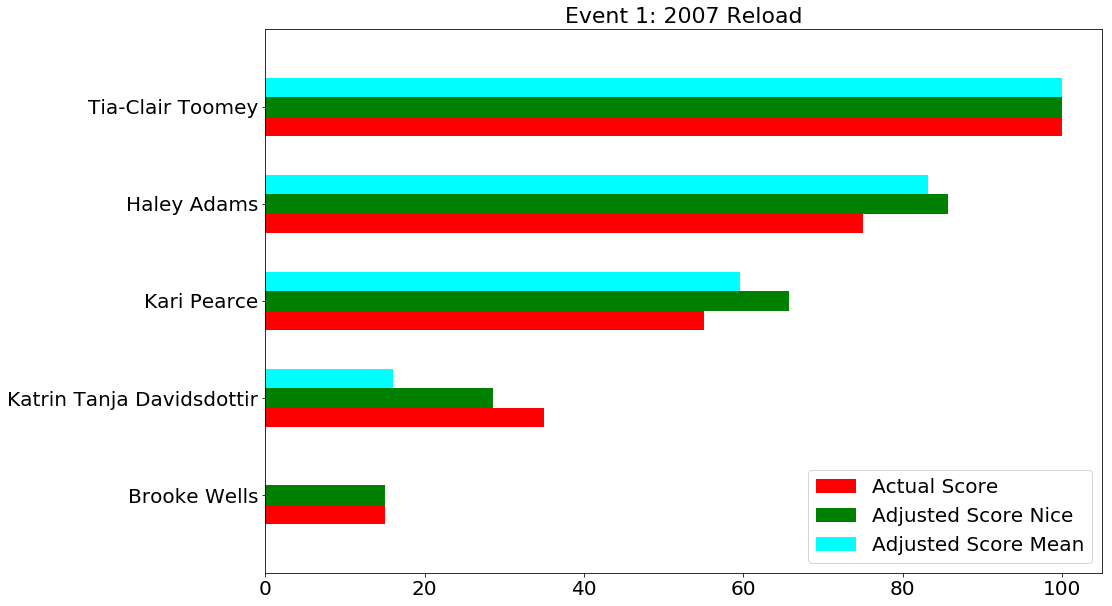

In [277]:
pretty_plot(event_1)

# Event 2

In [278]:
event_2 = stage_2[stage_2['ordinals']==10].sort_values('times')
event_2['score'] = [int(i[:-4]) for i in event_2['score']]
event_2 = event_2.sort_values('ranks', ascending = False)
event_2.name = 'Event 2: Corn Sack Sprint'

In [279]:
fastest_time_nice(event_2)
fastest_time_mean(event_2)
display(event_2)

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
89,Brooke Wells,10,3:35.02,5,15,215.02,15.00,0.00
49,Kari Pearce,10,3:28.17,4,35,208.17,34.76,23.24
69,Haley Adams,10,3:24.49,3,55,204.49,45.37,35.73
29,Katrin Tanja Davidsdottir,10,3:13.18,2,75,193.18,77.99,74.11
9,Tia-Clair Toomey,10,3:05.55,1,100,185.55,100.00,100.00


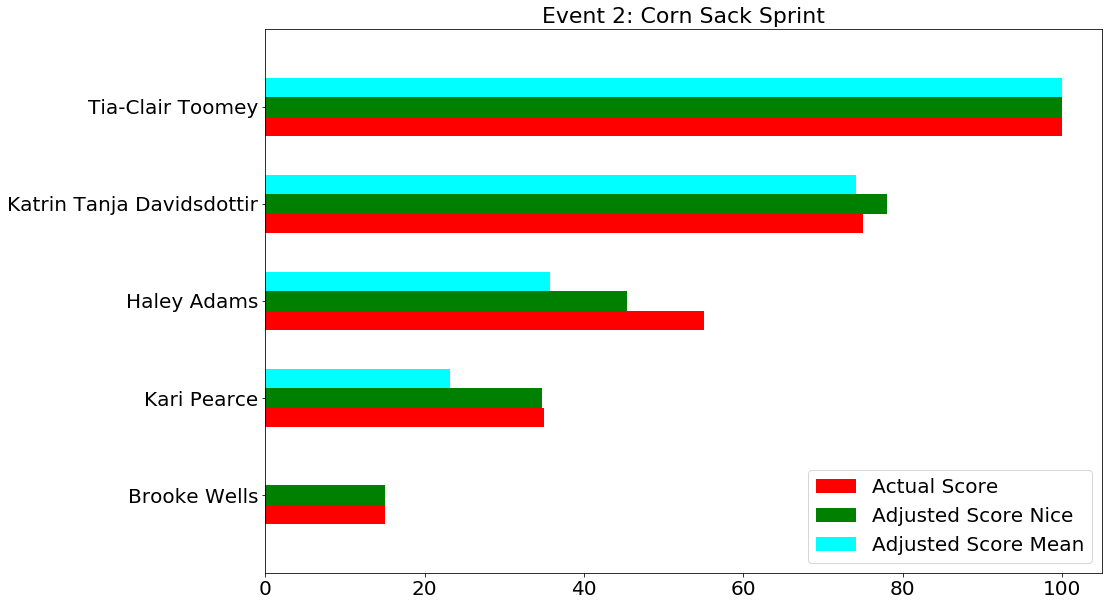

In [280]:
pretty_plot(event_2)

# Event 3

In [281]:
event_3 = stage_2[stage_2['ordinals']==11].sort_values('times')
event_3['score'] = [int(i[:-4]) for i in event_3['score']]
event_3 = event_3.sort_values('ranks', ascending = False)
event_3.name = 'Event 3: CrossFit Total'

In [282]:
most_weight_nice(event_3)
most_weight_mean(event_3)
display(event_3.sort_values('ranks'))

,competitors,ordinals,times,ranks,score,adjusted_score_nice,adjusted_score_mean
10,Tia-Clair Toomey,11,890,1,100,100.00,100.00
90,Brooke Wells,11,884,2,75,97.30,96.83
50,Kari Pearce,11,764,3,55,43.33,33.33
70,Haley Adams,11,712,4,35,19.95,5.82
30,Katrin Tanja Davidsdottir,11,701,5,15,15.00,0.00


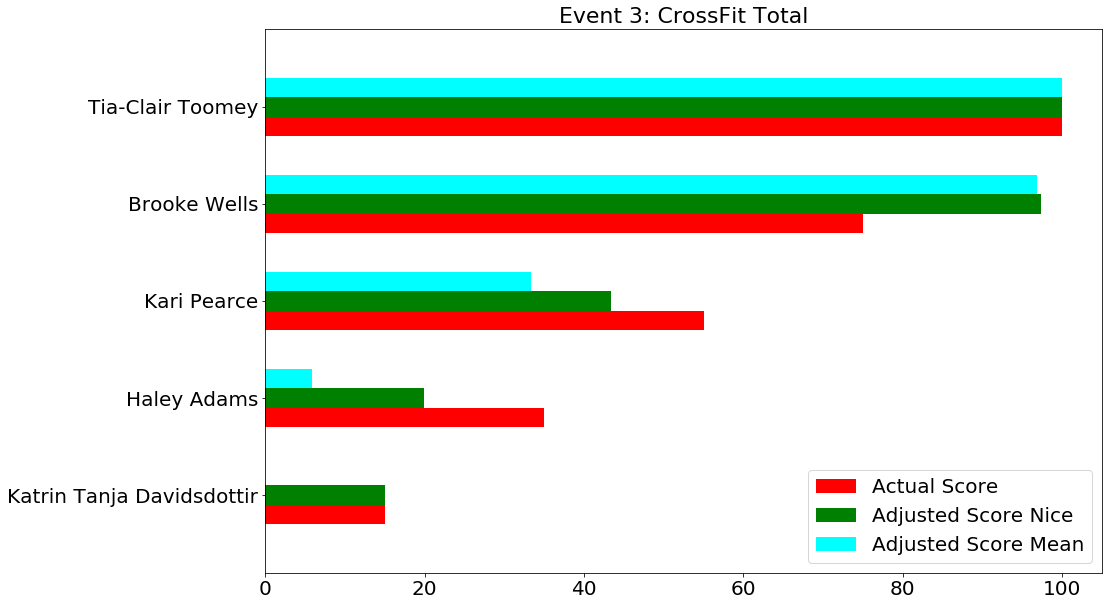

In [283]:
pretty_plot(event_3)

# Event 4

In [284]:
event_4 = stage_2[stage_2['ordinals']==12].sort_values('times')
event_4['score'] = [int(i[:-4]) for i in event_4['score']]
event_4 = event_4.sort_values('ranks', ascending=False)
event_4.name = 'Event 4: Handstand Sprint'

In [285]:
fastest_time_nice(event_4)
fastest_time_mean(event_4)
display(event_4)

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
11,Tia-Clair Toomey,12,2:05.67,5,15,125.67,15.00,-0.00
31,Katrin Tanja Davidsdottir,12,1:40.00,4,35,100.00,64.09,57.75
71,Haley Adams,12,1:24.25,3,55,84.25,94.21,93.18
51,Kari Pearce,12,1:23.32,2,75,83.32,95.98,95.28
91,Brooke Wells,12,1:21.22,1,100,81.22,100.00,100.00


In [286]:
event_4.name

'Event 4: Handstand Sprint'

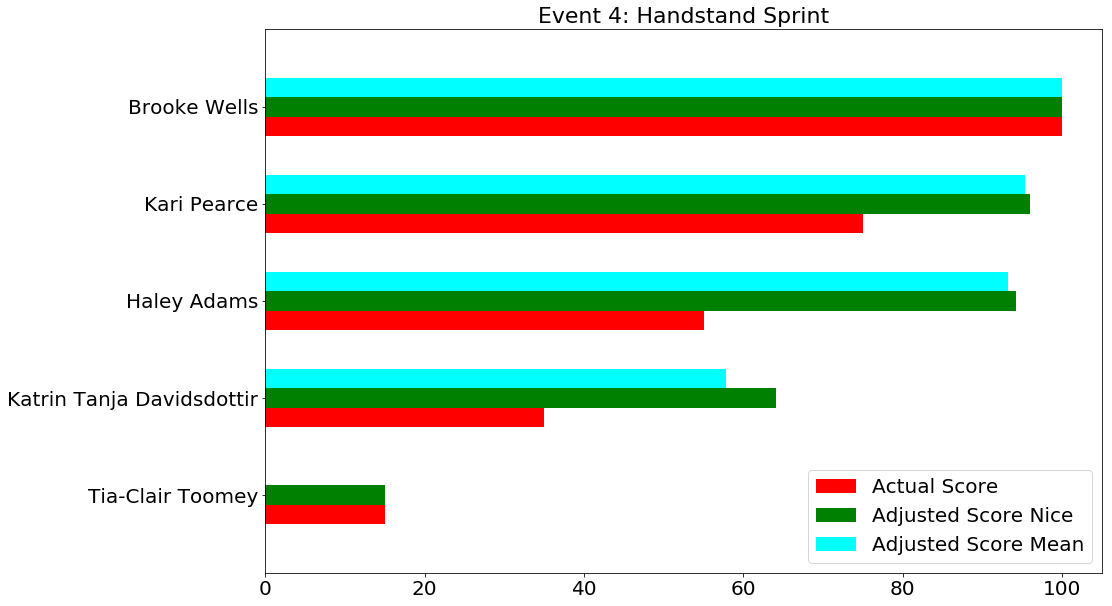

In [287]:
pretty_plot(event_4)

# Event 5

In [288]:
event_5 = stage_2[stage_2['ordinals']==13].sort_values('times')
event_5['score'] = [int(i[:-4]) for i in event_5['score']]
event_5 = event_5.sort_values('ranks', ascending=False)
event_5.name = 'Event 5: Ranch Loop'

In [289]:
fastest_time_nice(event_5)
fastest_time_mean(event_5)
display(event_5)

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
92,Brooke Wells,13,1:14:34.89,5,15,"4,474.89",15.00,0.00
52,Kari Pearce,13,1:07:07.07,4,35,"4,027.07",61.37,54.55
12,Tia-Clair Toomey,13,1:06:09.10,3,55,"3,969.10",67.37,61.61
72,Haley Adams,13,1:02:16.23,2,75,"3,736.23",91.48,89.98
32,Katrin Tanja Davidsdottir,13,1:00:53.98,1,100,"3,653.98",100.00,100.00


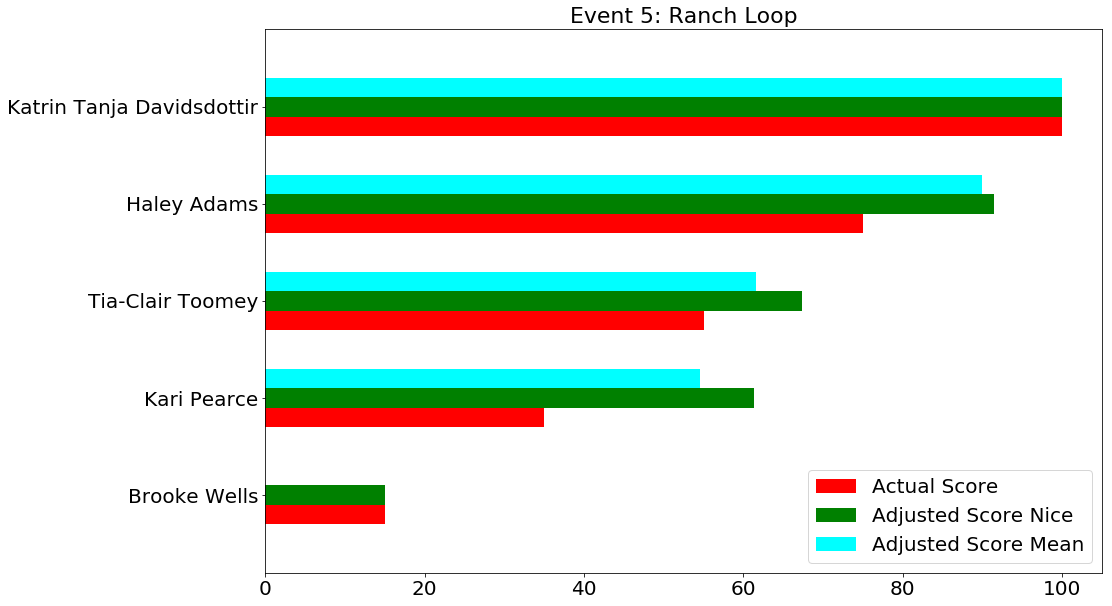

In [290]:
pretty_plot(event_5)

# Event 6

In [291]:
event_6 = stage_2[stage_2['ordinals']==14].sort_values('times')
event_6['score'] = [int(i[:-4]) for i in event_6['score']]
event_6 = event_6.sort_values('ranks', ascending = False)
event_6.name = 'Event 6: Toes-To-Bar/Lunge'

In [292]:
fastest_time_nice(event_6)
fastest_time_mean(event_6)
display(event_6)

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
73,Haley Adams,14,4:21.20,5,15,261.20,15.00,-0.00
53,Kari Pearce,14,4:13.36,4,35,253.36,29.01,16.48
93,Brooke Wells,14,3:51.05,3,55,231.05,68.87,63.38
33,Katrin Tanja Davidsdottir,14,3:37.03,2,75,217.03,93.92,92.85
13,Tia-Clair Toomey,14,3:33.63,1,100,213.63,100.00,100.00


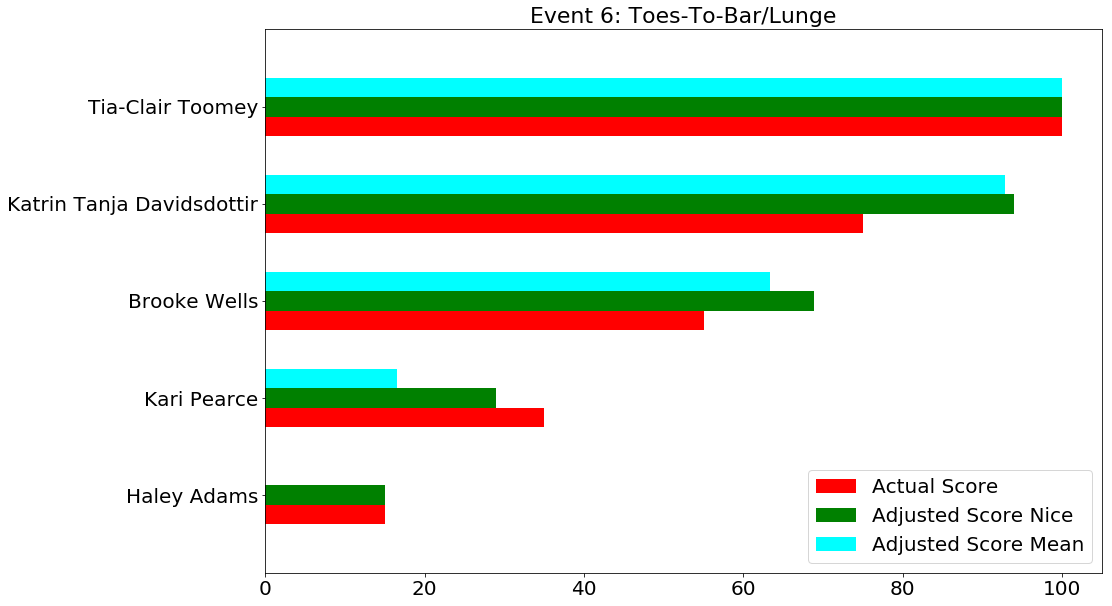

In [293]:
pretty_plot(event_6)

# Event 7

In [294]:
event_7_1_data = {'competitors': ['Tia-Clair Toomey', 'Kari Pearce', 'Katrin Tanja Davidsdottir', 'Brooke Wells', 'Haley Adams'],
                  'ordinals': [15.1, 15.1, 15.1, 15.1, 15.1],
                  'times': ['0:21.24', '0:22.97', '0:23.45', '0:23.70', '0:58.95']}
event_7_1 = pd.DataFrame.from_dict(event_7_1_data)
event_7_1

fastest_time_nice(event_7_1)
fastest_time_mean(event_7_1)
display(event_7_1.sort_values('times'))

,competitors,ordinals,times,total_seconds,adjusted_score_nice,adjusted_score_mean
0,Tia-Clair Toomey,15.10,0:21.24,21.24,100.00,100.00
1,Kari Pearce,15.10,0:22.97,22.97,96.10,95.41
2,Katrin Tanja Davidsdottir,15.10,0:23.45,23.45,95.02,94.14
3,Brooke Wells,15.10,0:23.70,23.70,94.46,93.48
4,Haley Adams,15.10,0:58.95,58.95,15.00,0.00


In [295]:
event_7_2_data = {'competitors': ['Tia-Clair Toomey', 'Brooke Wells', 'Katrin Tanja Davidsdottir', 'Kari Pearce'],
                  'ordinals': [15.2, 15.2, 15.2, 15.2],
                  'times': ['0:23.82', '0:25.65', '0:25.97', '0:47.61']}
event_7_2 = pd.DataFrame.from_dict(event_7_2_data)
event_7_2

fastest_time_nice(event_7_2)
fastest_time_mean(event_7_2)
display(event_7_2.sort_values('times'))

,competitors,ordinals,times,total_seconds,adjusted_score_nice,adjusted_score_mean
0,Tia-Clair Toomey,15.20,0:23.82,23.82,100.00,100.00
1,Brooke Wells,15.20,0:25.65,25.65,93.46,92.31
2,Katrin Tanja Davidsdottir,15.20,0:25.97,25.97,92.32,90.96
3,Kari Pearce,15.20,0:47.61,47.61,15.00,0.00


In [296]:
event_7_3_data = {'competitors': ['Tia-Clair Toomey', 'Brooke Wells', 'Katrin Tanja Davidsdottir'],
                  'ordinals': [15.3, 15.3, 15.3],
                  'times': ['0:30.06', '0:36.55', '1:28.00']}
event_7_3 = pd.DataFrame.from_dict(event_7_3_data)

fastest_time_nice(event_7_3)
fastest_time_mean(event_7_3)
display(event_7_3.sort_values('times'))

,competitors,ordinals,times,total_seconds,adjusted_score_nice,adjusted_score_mean
0,Tia-Clair Toomey,15.30,0:30.06,30.06,100.00,100.00
1,Brooke Wells,15.30,0:36.55,36.55,90.48,88.80
2,Katrin Tanja Davidsdottir,15.30,1:28.00,88.00,15.00,0.00


In [297]:
lst = [event_7_1, event_7_2, event_7_3]
pd.concat(lst)

,competitors,ordinals,times,total_seconds,adjusted_score_nice,adjusted_score_mean
0,Tia-Clair Toomey,15.10,0:21.24,21.24,100.00,100.00
1,Kari Pearce,15.10,0:22.97,22.97,96.10,95.41
2,Katrin Tanja Davidsdottir,15.10,0:23.45,23.45,95.02,94.14
3,Brooke Wells,15.10,0:23.70,23.70,94.46,93.48
4,Haley Adams,15.10,0:58.95,58.95,15.00,0.00
0,Tia-Clair Toomey,15.20,0:23.82,23.82,100.00,100.00
1,Brooke Wells,15.20,0:25.65,25.65,93.46,92.31
2,Katrin Tanja Davidsdottir,15.20,0:25.97,25.97,92.32,90.96
3,Kari Pearce,15.20,0:47.61,47.61,15.00,0.00
0,Tia-Clair Toomey,15.30,0:30.06,30.06,100.00,100.00


In [298]:
import numpy as np

brooke_nice = np.mean([94.46, 93.46, 90.48])
katrin_nice = np.mean([95.02, 92.32, 15.00])
kari_nice = np.mean([96.10, 15.00])

kari_mean = np.mean([95.41, 0.00])
brooke_mean = np.mean([93.48, 92.31, 88.80])
katrin_mean = np.mean([94.14, 90.96, 0.00])

event_7_adjusted = {'competitors': ['Tia-Clair Toomey', 'Brooke Wells', 'Katrin Tanja Davidsdottir', 'Kari Pearce', 'Haley Adams'],
                  'adjusted_score_nice': [100.00, brooke_nice, katrin_nice, kari_nice, 15.00],
                  'adjusted_score_mean': [100.00, brooke_mean, katrin_mean, kari_mean, 0.00]}

event_7_adjusted = pd.DataFrame.from_dict(event_7_adjusted)


event_7_adjusted

,competitors,adjusted_score_nice,adjusted_score_mean
0,Tia-Clair Toomey,100.00,100.00
1,Brooke Wells,92.80,91.53
2,Katrin Tanja Davidsdottir,67.45,61.70
3,Kari Pearce,55.55,47.70
4,Haley Adams,15.00,0.00


In [299]:
event_7 = stage_2[stage_2['ordinals']==15].sort_values('ranks')

event_7['total_seconds'] = event_7['times']
event_7 = event_7.merge(event_7_adjusted, on='competitors')
event_7['score'] = [int(i[:-4]) for i in event_7['score']]
event_7 = event_7.sort_values('ranks', ascending = False)
event_7.name = 'Event 7: Snatch Speed Triple'
event_7

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
4,Haley Adams,15,15,5,15,15,15.00,0.00
3,Kari Pearce,15,35,4,35,35,55.55,47.70
2,Katrin Tanja Davidsdottir,15,55,3,55,55,67.45,61.70
1,Brooke Wells,15,75,2,75,75,92.80,91.53
0,Tia-Clair Toomey,15,100,1,100,100,100.00,100.00


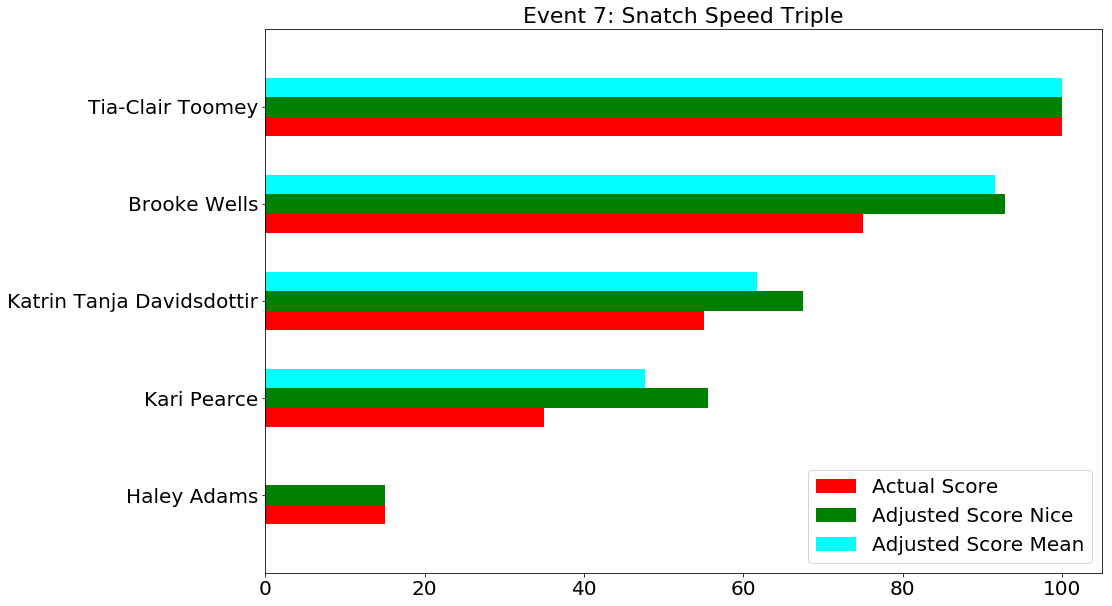

In [300]:
pretty_plot(event_7)

# Event 8

In [301]:
event_8 = stage_2[stage_2['ordinals']==16].sort_values('times')
event_8['score'] = [int(i[:-4]) for i in event_8['score']]
event_8 = event_8.sort_values('ranks', ascending = False)
event_8.name = 'Event 8: Bike Repeater'

In [302]:
fastest_time_nice(event_8)
fastest_time_mean(event_8)
display(event_8)

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
95,Brooke Wells,16,16:39.54,5,15,999.54,15.00,0.00
35,Katrin Tanja Davidsdottir,16,15:36.02,4,35,936.02,59.24,52.05
55,Kari Pearce,16,15:14.92,3,55,914.92,73.94,69.34
75,Haley Adams,16,14:53.61,2,75,893.61,88.79,86.81
15,Tia-Clair Toomey,16,14:37.51,1,100,877.51,100.00,100.00


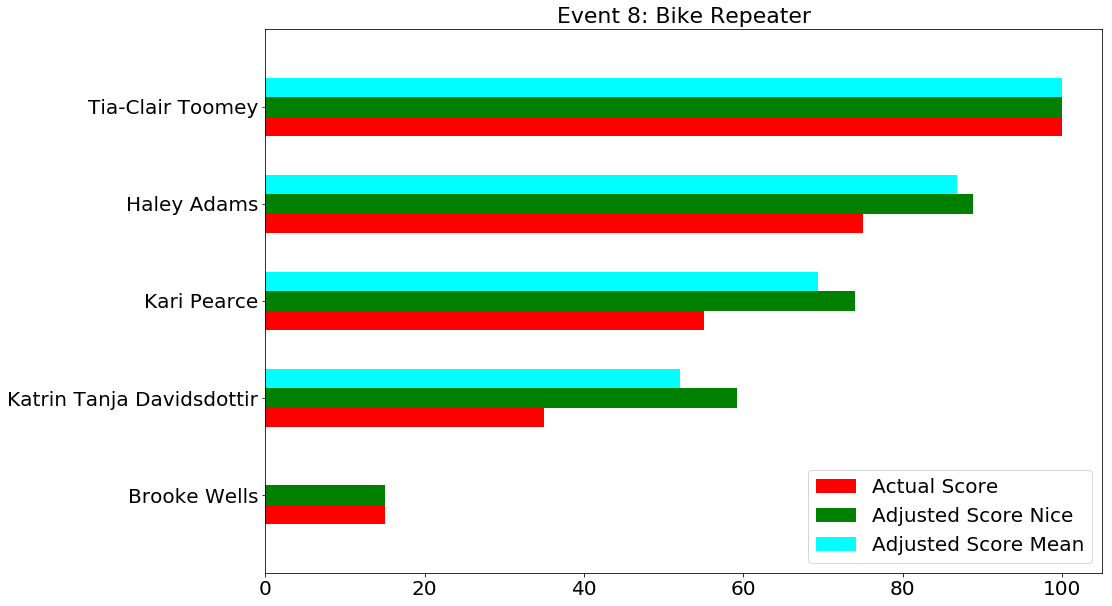

In [303]:
pretty_plot(event_8)

# Event 9

In [304]:
event_9 = stage_2[stage_2['ordinals']==17].sort_values('times')
event_9['score'] = [int(i[:-4]) for i in event_9['score']]
event_9 = event_9.sort_values('ranks', ascending = False)
event_9.name = 'Event 9: Happy Star'

In [305]:
fastest_time_nice(event_9)
fastest_time_mean(event_9)
display(event_9)

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
76,Haley Adams,17,10:18.46,5,15,618.46,15.00,-0.00
96,Brooke Wells,17,10:05.21,4,35,605.21,26.75,13.82
36,Katrin Tanja Davidsdottir,17,9:32.02,3,55,572.02,56.17,48.44
56,Kari Pearce,17,9:17.37,2,75,557.37,69.16,63.72
16,Tia-Clair Toomey,17,8:42.59,1,100,522.59,100.00,100.00


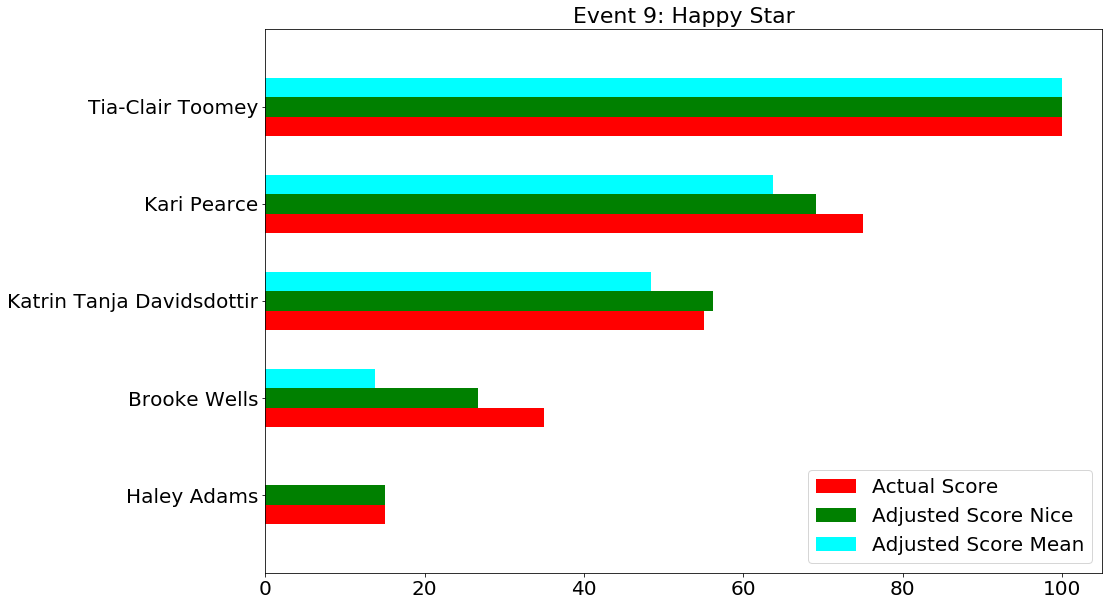

In [306]:
pretty_plot(event_9)

# Event 10

In [307]:
event_10 = stage_2[stage_2['ordinals']==18].sort_values('times')
event_10['score'] = [int(i[:-4]) for i in event_10['score']]
event_10 = event_10.sort_values('ranks', ascending = False)
event_10.name = "Event 10: Swim 'N' Stuff"

In [308]:
fastest_time_nice(event_10)
fastest_time_mean(event_10)
display(event_10)

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
57,Kari Pearce,18,10:10.58,5,15,610.58,15.00,0.00
97,Brooke Wells,18,9:39.96,4,35,579.96,40.00,29.41
37,Katrin Tanja Davidsdottir,18,8:47.62,3,55,527.62,82.74,79.69
77,Haley Adams,18,8:40.41,2,75,520.41,88.63,86.62
17,Tia-Clair Toomey,18,8:26.48,1,100,506.48,100.00,100.00


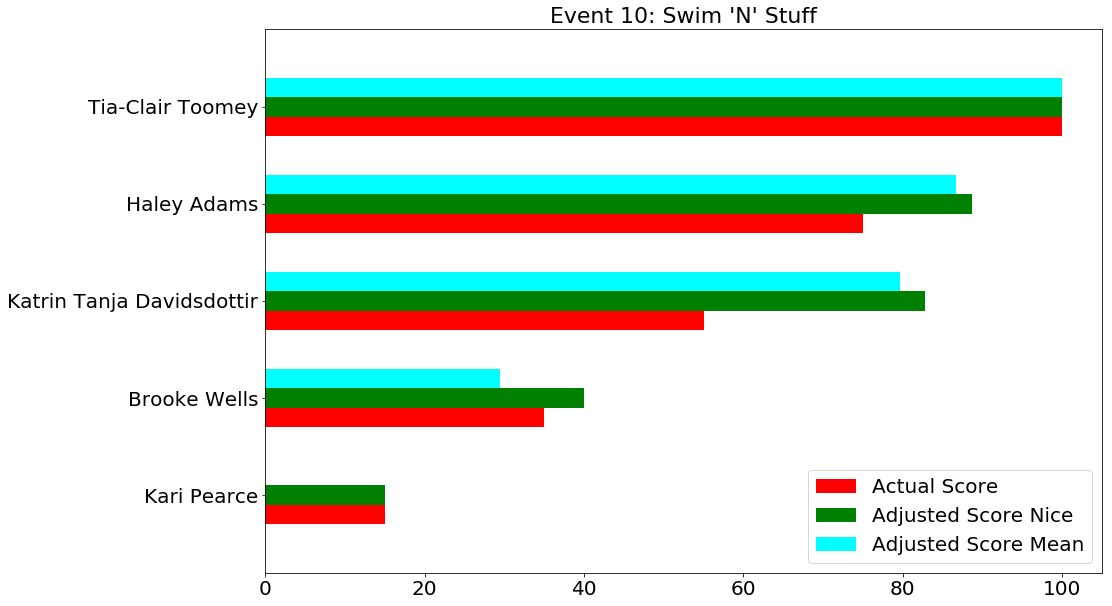

In [309]:
pretty_plot(event_10)

# Event 11

In [310]:
event_11 = stage_2[stage_2['ordinals']==19].sort_values('times')
event_11['score'] = [int(i[:-4]) for i in event_11['score']]
event_11 = event_11.sort_values('ranks', ascending = False)
event_11.name = 'Event 11: Sprint Sled Sprint'

In [311]:
fastest_time_nice(event_11)
fastest_time_mean(event_11)
display(event_11)

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
58,Kari Pearce,19,1:24.51,5,15,84.51,15.00,0.00
78,Haley Adams,19,1:14.93,4,35,74.93,57.24,49.69
38,Katrin Tanja Davidsdottir,19,1:12.57,3,55,72.57,67.64,61.93
98,Brooke Wells,19,1:07.81,2,75,67.81,88.63,86.62
18,Tia-Clair Toomey,19,1:05.23,1,100,65.23,100.00,100.00


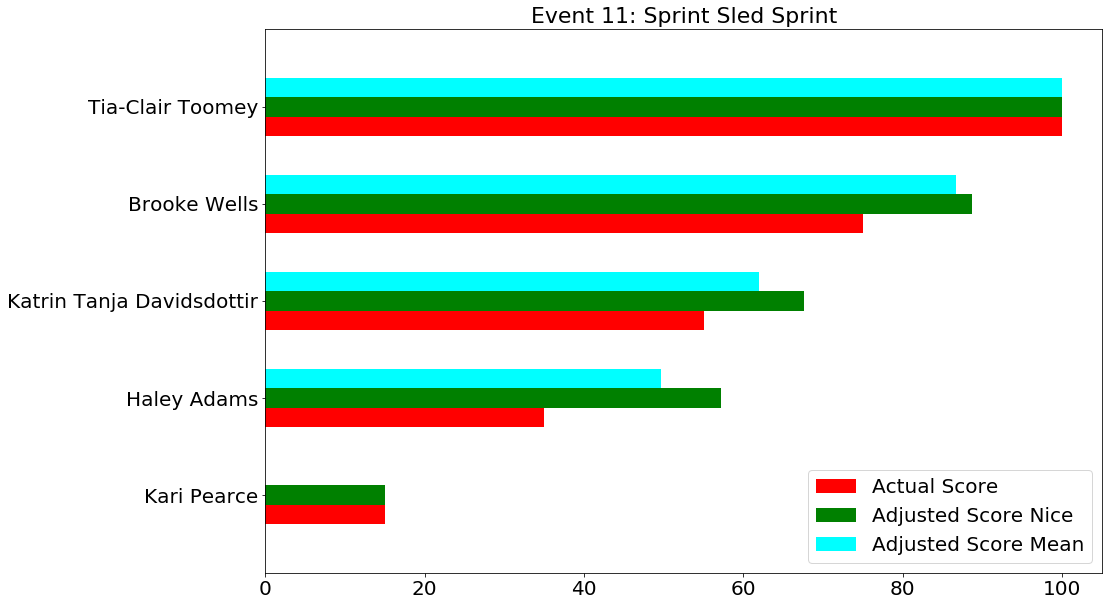

In [312]:
pretty_plot(event_11)

# Event 12

In [313]:
event_12 = stage_2[stage_2['ordinals']==20].sort_values('times')
event_12['score'] = [int(i[:-4]) for i in event_12['score']]
event_12 = event_12.sort_values('ranks', ascending = False)
event_12.name = 'Event 12: Atlanta'

In [314]:
fastest_time_nice(event_12)
fastest_time_mean(event_12)
display(event_12)

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
99,Brooke Wells,20,1:00:19.01,5,15,"3,619.01",15.00,-0.00
79,Haley Adams,20,52:56.60,4,35,"3,176.60",65.66,59.60
19,Tia-Clair Toomey,20,51:46.72,3,55,"3,106.72",73.66,69.01
39,Katrin Tanja Davidsdottir,20,49:09.96,2,75,"2,949.96",91.61,90.13
59,Kari Pearce,20,47:56.68,1,100,"2,876.68",100.00,100.00


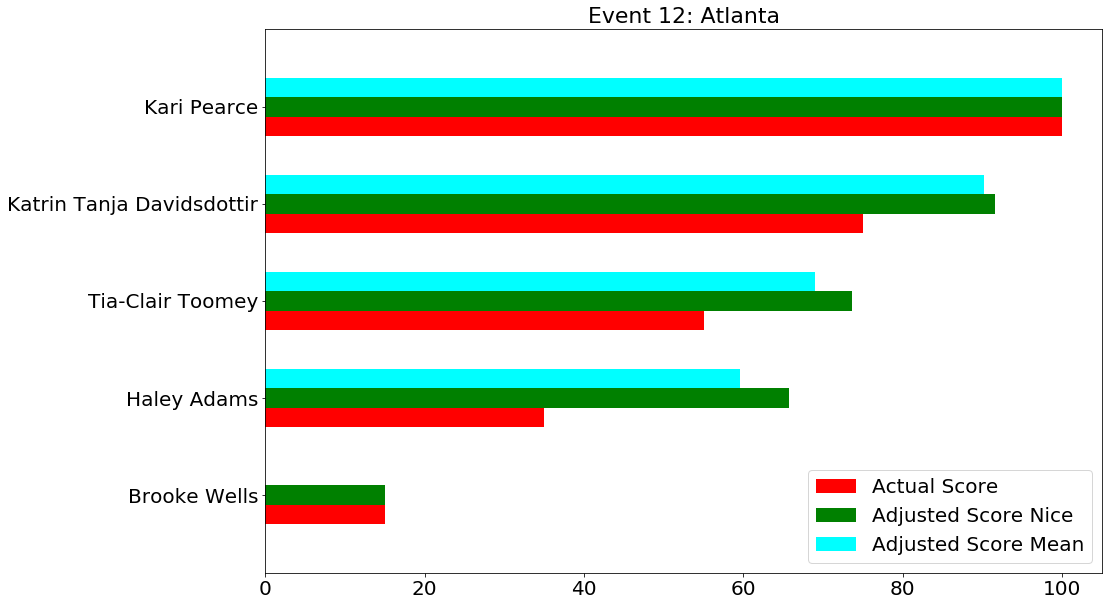

In [315]:
pretty_plot(event_12)

# Final Analysis

In [316]:
frames = [event_1, event_2, event_3, event_4, event_5, event_6, event_7, event_8, event_9, event_10, event_11, event_12]
final_df = pd.concat(frames)[['competitors', 'ordinals', 'times', 'ranks', 'score', 'total_seconds', 'adjusted_score_nice', 'adjusted_score_mean']]
final_df['event #'] = final_df['ordinals']-8
final_df = final_df.drop(columns=['ordinals','total_seconds'])


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [317]:
final_df.sort_values(['event #','ranks']).to_clipboard(sep=',', index=False) 

In [318]:
adjusted_placements = final_df.groupby('competitors').agg({'adjusted_score_nice':'sum', 'adjusted_score_mean':'sum', 'score':'sum'}).sort_values('adjusted_score_nice', ascending=False)


In [319]:
adjusted_placements['adjusted_placement'] = [i+1 for i in range(len(adjusted_placements))]

In [320]:
adjusted_placements

,adjusted_score_nice,adjusted_score_mean,score,adjusted_placement
competitors,,,,
Tia-Clair Toomey,"1,056.03","1,030.62",1025,1
Katrin Tanja Davidsdottir,804.47,734.67,665,2
Haley Adams,682.01,590.60,560,3
Kari Pearce,658.79,563.28,585,4
Brooke Wells,589.35,481.59,525,5


In [321]:
actual_placement = []

for i in range(len(leaderboard)):
    competitors = leaderboard[i]['entrant']['competitorName']
    placement = leaderboard[i]['overallRank']
    actual_placement.append((competitors, placement))

In [322]:
final_placements = pd.DataFrame(actual_placement, columns=['competitors','actual_placement']).iloc[0:5]

In [323]:
final_placements

,competitors,actual_placement
0,Tia-Clair Toomey,1
1,Katrin Tanja Davidsdottir,2
2,Kari Pearce,3
3,Haley Adams,4
4,Brooke Wells,5


In [324]:
df = final_placements.join(adjusted_placements, how='inner', on='competitors')
df = df[['competitors','score','actual_placement','adjusted_score_nice','adjusted_score_mean','adjusted_placement']]
df = df.sort_values('actual_placement', ascending=False)
df.name = 'Final Results'

In [325]:
df

,competitors,score,actual_placement,adjusted_score_nice,adjusted_score_mean,adjusted_placement
4,Brooke Wells,525,5,589.35,481.59,5
3,Haley Adams,560,4,682.01,590.60,3
2,Kari Pearce,585,3,658.79,563.28,4
1,Katrin Tanja Davidsdottir,665,2,804.47,734.67,2
0,Tia-Clair Toomey,1025,1,"1,056.03","1,030.62",1


In [326]:
df.sort_values('actual_placement', ascending=True).to_clipboard(sep=',', index=False)


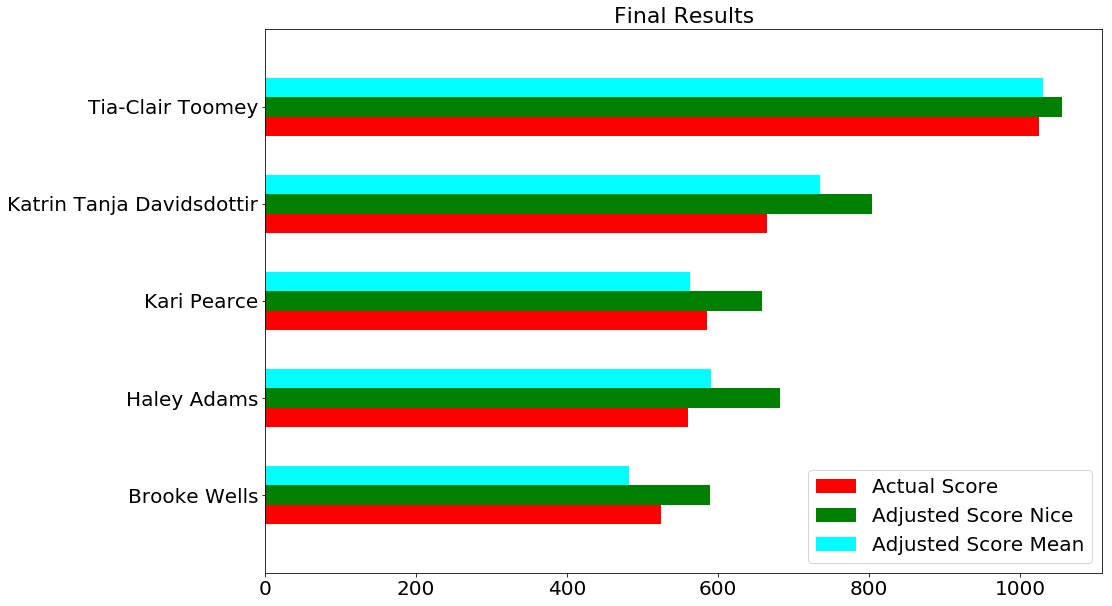

In [327]:
pretty_plot(df)

In [328]:
final_df['nice_diff'] = final_df['adjusted_score_nice']-final_df['score']

In [331]:
Adams = final_df[final_df['competitors']=='Haley Adams']
Adams

,competitors,times,ranks,score,adjusted_score_nice,adjusted_score_mean,event #,nice_diff
68,Haley Adams,13:17.79,2,75,85.70,83.17,1,10.70
69,Haley Adams,3:24.49,3,55,45.37,35.73,2,-9.63
70,Haley Adams,712,4,35,19.95,5.82,3,-15.05
71,Haley Adams,1:24.25,3,55,94.21,93.18,4,39.21
72,Haley Adams,1:02:16.23,2,75,91.48,89.98,5,16.48
73,Haley Adams,4:21.20,5,15,15.00,-0.00,6,0.00
4,Haley Adams,15,5,15,15.00,0.00,7,0.00
75,Haley Adams,14:53.61,2,75,88.79,86.81,8,13.79
76,Haley Adams,10:18.46,5,15,15.00,-0.00,9,0.00
77,Haley Adams,8:40.41,2,75,88.63,86.62,10,13.63


In [334]:
Pearce = final_df[final_df['competitors']=='Kari Pearce']
Pearce

,competitors,times,ranks,score,adjusted_score_nice,adjusted_score_mean,event #,nice_diff
48,Kari Pearce,13:59.51,3,55,65.68,59.62,1,10.68
49,Kari Pearce,3:28.17,4,35,34.76,23.24,2,-0.24
50,Kari Pearce,764,3,55,43.33,33.33,3,-11.67
51,Kari Pearce,1:23.32,2,75,95.98,95.28,4,20.98
52,Kari Pearce,1:07:07.07,4,35,61.37,54.55,5,26.37
53,Kari Pearce,4:13.36,4,35,29.01,16.48,6,-5.99
3,Kari Pearce,35,4,35,55.55,47.70,7,20.55
55,Kari Pearce,15:14.92,3,55,73.94,69.34,8,18.94
56,Kari Pearce,9:17.37,2,75,69.16,63.72,9,-5.84
57,Kari Pearce,10:10.58,5,15,15.00,0.00,10,0.00


In [336]:
Wells = final_df[final_df['competitors']=='Brooke Wells']
Wells

,competitors,times,ranks,score,adjusted_score_nice,adjusted_score_mean,event #,nice_diff
88,Brooke Wells,15:45.13,5,15,15.00,0.00,1,0.00
89,Brooke Wells,3:35.02,5,15,15.00,0.00,2,0.00
90,Brooke Wells,884,2,75,97.30,96.83,3,22.30
91,Brooke Wells,1:21.22,1,100,100.00,100.00,4,0.00
92,Brooke Wells,1:14:34.89,5,15,15.00,0.00,5,0.00
93,Brooke Wells,3:51.05,3,55,68.87,63.38,6,13.87
1,Brooke Wells,75,2,75,92.80,91.53,7,17.80
95,Brooke Wells,16:39.54,5,15,15.00,0.00,8,0.00
96,Brooke Wells,10:05.21,4,35,26.75,13.82,9,-8.25
97,Brooke Wells,9:39.96,4,35,40.00,29.41,10,5.00


In [332]:
sum(Adams['adjusted_score_nice'].iloc[0:-1])

616.3514871514187

In [335]:
sum(Pearce['adjusted_score_nice'].iloc[0:-1])

558.7867374185639